In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


In [32]:
heart = pd.read_csv("..\\data\\processed\\heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


In [33]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [34]:
heart.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
thal        486
num           0
dtype: int64

In [35]:
trest = heart.groupby("sex")["trestbps"].mean()
heart["trestbps"] = heart["trestbps"].fillna(heart["sex"].map(trest))

In [36]:
chol = heart.groupby("sex")["chol"].mean()
heart["chol"] = heart["chol"].fillna(heart["sex"].map(chol))

In [37]:
thalch = heart.groupby("sex")["thalch"].mean()
heart["thalch"] = heart["thalch"].fillna(heart["sex"].map(thalch))

In [38]:
oldpeak = heart.groupby("sex")["oldpeak"].mean()
heart["oldpeak"] = heart["oldpeak"].fillna(heart["sex"].map(oldpeak))

In [39]:
fbs= (heart.groupby('sex')['fbs'].agg(lambda x: x.mode().iat[0]))
heart['fbs'] = heart['fbs'].fillna(heart['sex'].map(fbs))

C:\Users\moust\AppData\Local\Temp\ipykernel_5268\1323159648.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart['fbs'] = heart['fbs'].fillna(heart['sex'].map(fbs))


In [40]:
restecg= (heart['restecg'].agg(lambda x: x.mode().iat[0]))
heart['restecg'] = heart['restecg'].fillna(restecg)

In [41]:
exang= (heart['exang'].agg(lambda x: x.mode().iat[0]))
heart['exang'] = heart['exang'].fillna(exang)

C:\Users\moust\AppData\Local\Temp\ipykernel_5268\1063660224.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart['exang'] = heart['exang'].fillna(exang)


In [42]:
slope= (heart.groupby('sex')['slope'].agg(lambda x: x.mode().iat[0]))
heart['slope'] = heart['slope'].fillna(heart['sex'].map(slope))

In [43]:
thal= (heart.groupby('sex')['thal'].agg(lambda x: x.mode().iat[0]))
heart['thal'] = heart['thal'].fillna(heart['sex'].map(thal))

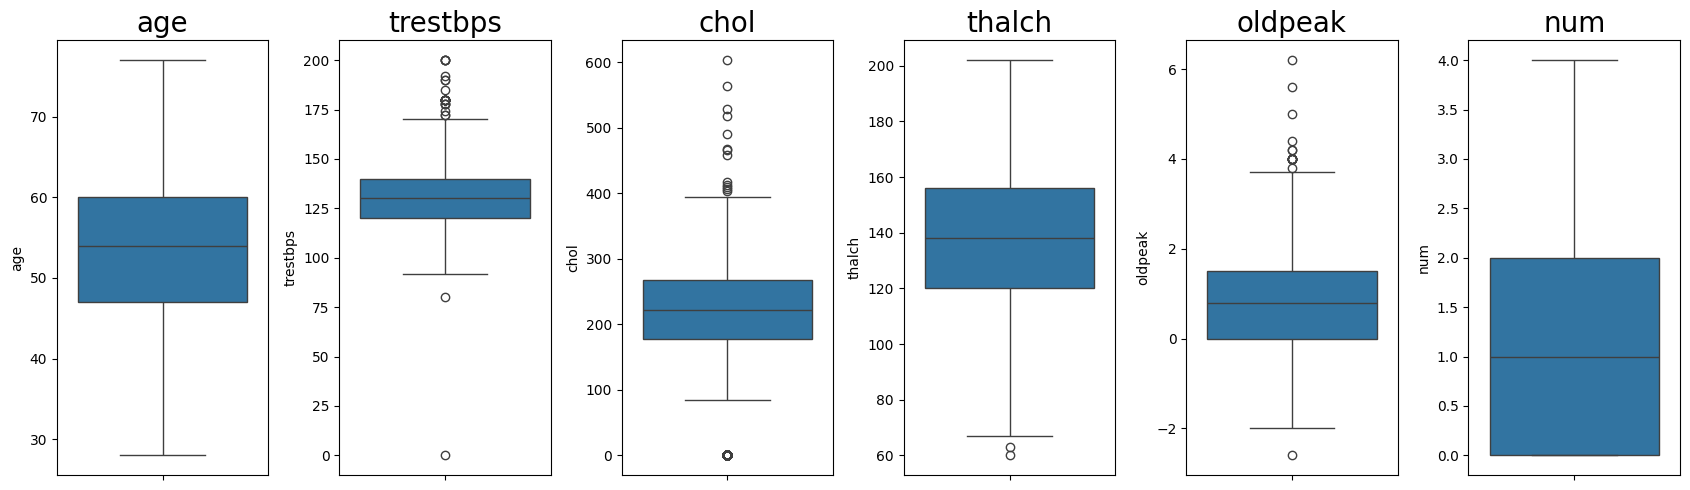

In [44]:
columns = heart.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(17, 5))

for i,col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    plt.title(col, fontsize=20)
    sns.boxplot(heart[col])
plt.tight_layout()
plt.show()

In [45]:
columns = ["trestbps",'chol',"thalch",'oldpeak']

In [46]:
for col in columns:
        Q1 = heart[col].quantile(0.25)
        Q3 = heart[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        heart = heart[
            (heart[col] >= lower) & (heart[col] <= upper)
        ]


In [47]:
heart.duplicated().sum()


np.int64(2)

In [48]:
heart = heart.drop_duplicates()

In [49]:
heart["num"] = (heart["num"] >= 1).astype(int)


In [50]:
y = heart[["num"]]
x = heart.drop("num", axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=60)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=60)


In [52]:
scaler = StandardScaler()
num = x.select_dtypes(include=(["Float64","int64"])).columns
num

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')

In [53]:
cat = heart.select_dtypes(include=(["object","category"])).columns
cat

Index(['sex', 'cp', 'restecg', 'slope', 'thal'], dtype='object')

In [54]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num),
        ("cat",OneHotEncoder(handle_unknown="ignore"), cat)
    ],
    remainder="passthrough"  
)

In [55]:
preprocess.fit(X_train)


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [56]:
X_train_scaled = preprocess.transform(X_train)
X_val_scaled   = preprocess.transform(X_val)
X_test_scaled  = preprocess.transform(X_test)


In [57]:
scaled_feature_names = preprocess.get_feature_names_out()


In [58]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaled_feature_names, index=X_train.index)
X_val_scaled   = pd.DataFrame(X_val_scaled, columns=scaled_feature_names, index=X_val.index)
X_test_scaled  = pd.DataFrame(X_test_scaled, columns=scaled_feature_names, index=X_test.index)

In [59]:
X_train = X_train_scaled.to_csv("..\\data\\processed\\x_train.csv",index=False)
X_val = X_val_scaled.to_csv("..\\data\\processed\\x_val.csv",index=False)
X_test = X_test_scaled.to_csv("..\\data\\processed\\x_test.csv",index=False)


In [60]:
y_train = y_train.to_csv("..\\data\\processed\\y_train.csv",index=False)
y_val = y_val.to_csv("..\\data\\processed\\y_val.csv",index=False)
y_test = y_test.to_csv("..\\data\\processed\\y_test.csv",index=False)